In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("white")
%matplotlib inline

In [2]:
T = pd.DataFrame(np.array([[.02, .09, .21], [.12, .16 ,.09], [.23, .06, .02]]),
                columns = ["Low", "Medium", "High"],
                index = ["A", "B", "C"])

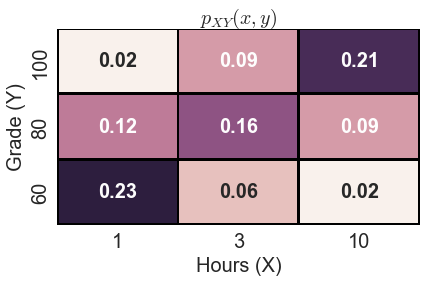

In [3]:
fig, ax = plt.subplots(1)
sns.heatmap(T, cbar = False, annot_kws = {"fontsize" : 20, "weight":"bold"},linewidths = 2, linecolor = "black",
            annot=True)
ax.set_ylabel("Grade (Y)", fontsize = 20)
ax.set_xlabel("Hours (X)", fontsize = 20)
ax.set_xticklabels([1, 3, 10], fontsize = 20)
ax.set_yticklabels([60, 80, 100], fontsize = 20)
ax.set_title("$p_{XY}(x, y)$", fontsize = 20)
plt.tight_layout()
fig.savefig("joint")

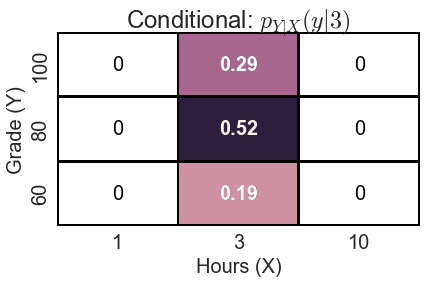

In [4]:
py_x = T.values[:,1]/T.values[:,1].sum()
T = pd.DataFrame(np.array([[0,0,0], py_x, [0, 0, 0]]).T,
                columns = ["1", "3", "10"],
                index = ["60", "80", "100"])

M = np.array([[1,0,1], [1,0,1],[1,0,1]], dtype = bool)
fig, ax = plt.subplots(1)
sns.heatmap(T, annot = True, cbar = False, annot_kws = {"fontsize" : 20, "color":"k"}, alpha = 0)
sns.heatmap(T, mask= M, cbar=False, linewidths = 2, linecolor = "black",
            annot=True, annot_kws={"weight": "bold", "fontsize":20})
ax.set_ylabel("Grade (Y)", fontsize = 20)
ax.set_xlabel("Hours (X)", fontsize = 20)
ax.set_xticklabels(T.columns, fontsize = 20)
ax.set_yticklabels(T.index, fontsize = 20)
ax.set_title("Conditional: $p_{Y|X}(y|3)$", fontsize = 24)
plt.tight_layout()
fig.savefig("cond")

In [5]:
T = np.array([[.02, .09, .21], [.12, .16 ,.09], [.23, .06, .02]])
EYx = []
for i in [0,1,2]:
    py_x = T[:,i]/T[:,i].sum()
    print(py_x.round(3))
    EYx.append(np.sum(py_x*np.array([100, 80, 60])))

[ 0.054  0.324  0.622]
[ 0.29   0.516  0.194]
[ 0.656  0.281  0.062]


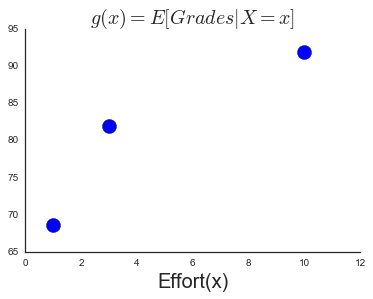

In [6]:
fig, ax = plt.subplots(1)
ax.scatter([1,3,10], EYx, s= 200)
sns.despine()
ax.set_xlabel("Effort(x)", fontsize = 20)
ax.set_title("$g(x) = E[Grades | X = x]$", fontsize = 20)
fig.savefig("EYx_grades")

---

In [7]:
n = 50
X = np.linspace(0.1, 6, n)
Y = np.linspace(-3, 3, n)
f = lambda x: np.sqrt(x)
Z = np.empty((n,n))
for i, x in enumerate(X):
    Z[i,:] = ss.norm(f(x), 1).pdf(Y)

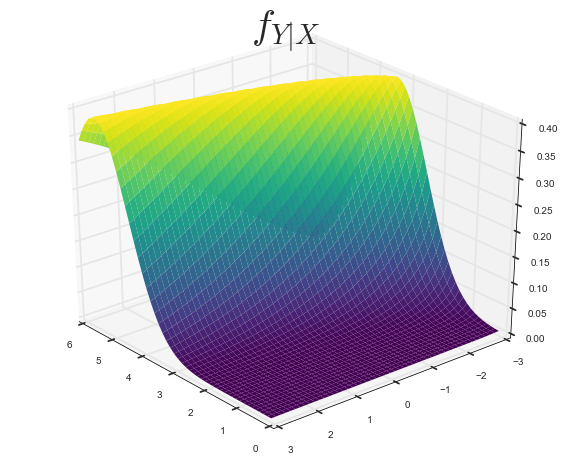

In [8]:
fig = plt.figure(figsize = (10, 8))
XX, YY = np.meshgrid(X, Y)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z, 
                       rstride = 1,
                       cstride= 1,
                       cmap=plt.cm.viridis,
                       linewidth=0)
ax.view_init(azim = 140)
ax.set_title("$f_{Y|X}$", fontsize = 40)
fig.savefig("cond_norm_3d")

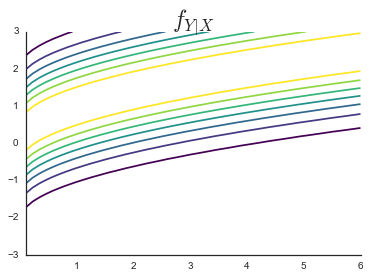

In [9]:
fig, ax = plt.subplots(1)
ax.contour(X, Y, Z.T, cmap = plt.cm.viridis)
ax.set_title("$f_{Y|X}$", fontsize = 24)
fig.savefig("cond_norm_contour")
sns.despine()

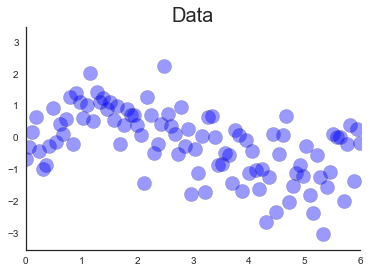

In [10]:
n = 100
X = np.linspace(0, 6, n)
f = lambda x: np.sin(x)
Z = f(X) + np.random.normal(0, .8, n)
fig, ax = plt.subplots(1)
ax.scatter(X, Z, s = 200, alpha = .4)
ax.set_ylim(-3.5, 3.5);
ax.set_xlim(0, 6)
ax.set_title("Data", fontsize = 20)
sns.despine()
fig.savefig("cond_norm_data")

---

In [11]:
n = 100
X = np.linspace(0, 6, n)
Y = np.linspace(-3, 3, n)
f = lambda x: np.sin(x)
Z = np.empty((n,n))
for i, x in enumerate(X):
    Z[i,:] = ss.lognorm(1.2, loc = f(x) - 1, scale = 1).pdf(Y)

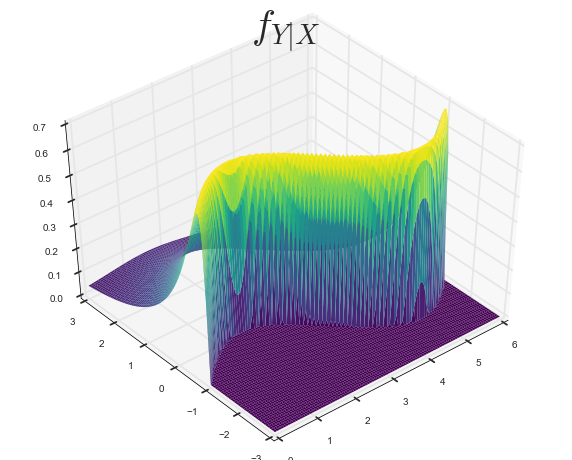

In [12]:
fig = plt.figure(figsize = (10, 8))
XX, YY = np.meshgrid(X, Y)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, Z.T, 
                       rstride = 1,
                       cstride= 1,
                       cmap=plt.cm.viridis,
                       linewidth=0)
ax.view_init(azim = 230, elev = 45)
ax.set_title("$f_{Y|X}$", fontsize = 40)
fig.savefig("cond_lognorm_3d")

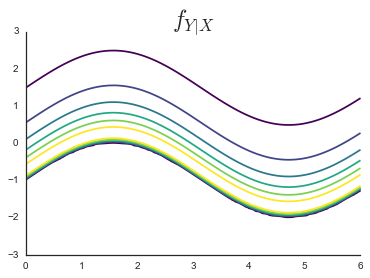

In [13]:
fig, ax = plt.subplots(1)
ax.contour(X, Y, Z.T, cmap = plt.cm.viridis)
ax.set_title("$f_{Y|X}$", fontsize = 24)
fig.savefig("cond_lognorm_contour")
sns.despine()

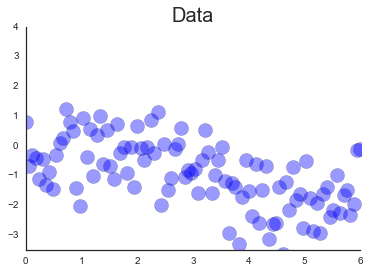

In [14]:
n = 100
X = np.linspace(0, 6, n)
f = lambda x: np.sin(x)
Z = ss.norm(loc = f(X) - 1, scale = .8).rvs(n)
fig, ax = plt.subplots(1)
ax.scatter(X, Z, s = 200, alpha = .4)
ax.set_ylim(-3.5, 4);
ax.set_xlim(0, 6)
sns.despine()
ax.set_title("Data", fontsize = 20)
fig.savefig("cond_lognorm_data")

---

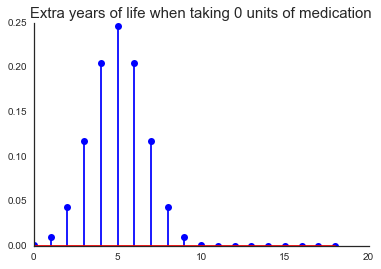

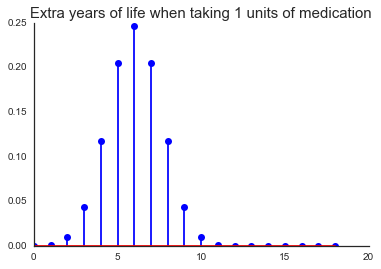

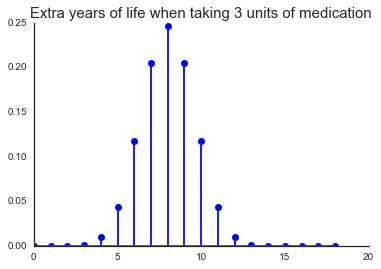

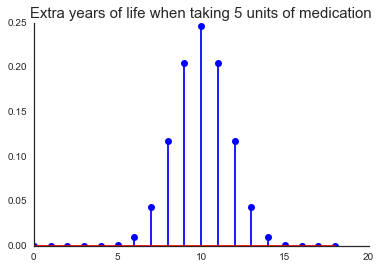

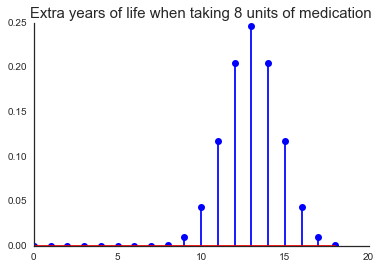

In [15]:
p = 1/2
n = 10

for s in [0, 1, 3, 5, 8]:
    fig, ax = plt.subplots(1)
    x = np.arange(1,20)
    y = ss.binom(n, p).pmf(x - s - 1) 
    ax.stem(y, linefmt='b-', markerfmt='bo', basefmt='r-')
    ax.set_xlim((0, 20))
    ax.set_title("Extra years of life when taking %d units of medication" % s, fontsize = 15)
    sns.despine()
    fig.savefig("extra_binom%d" % s)

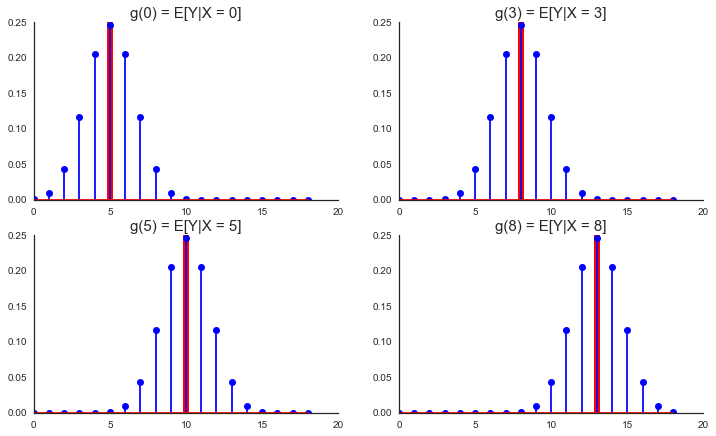

In [16]:
p = 1/2
n = 10
S = [0, 3, 5, 8]


fig, axs = plt.subplots(2, 2, figsize = (12, 7))

for k, ax in enumerate(axs.flatten()):
    X = np.arange(1,20)
    Y = ss.binom(n, p).pmf(X - S[k] - 1) 
    E = X.dot(Y)
    ax.stem(Y, linefmt='b-', markerfmt='bo', basefmt='r-', alpha=  .3, color = "black")
    ax.vlines(E - 1, 0, .25, linewidth = 6, color = "red")
    ax.set_xlim((0, 20))
    ax.set_title("g(%d) = E[Y|X = %d]" % (S[k], S[k]), fontsize = 15)
    sns.despine()
fig.savefig("EYX_binom")

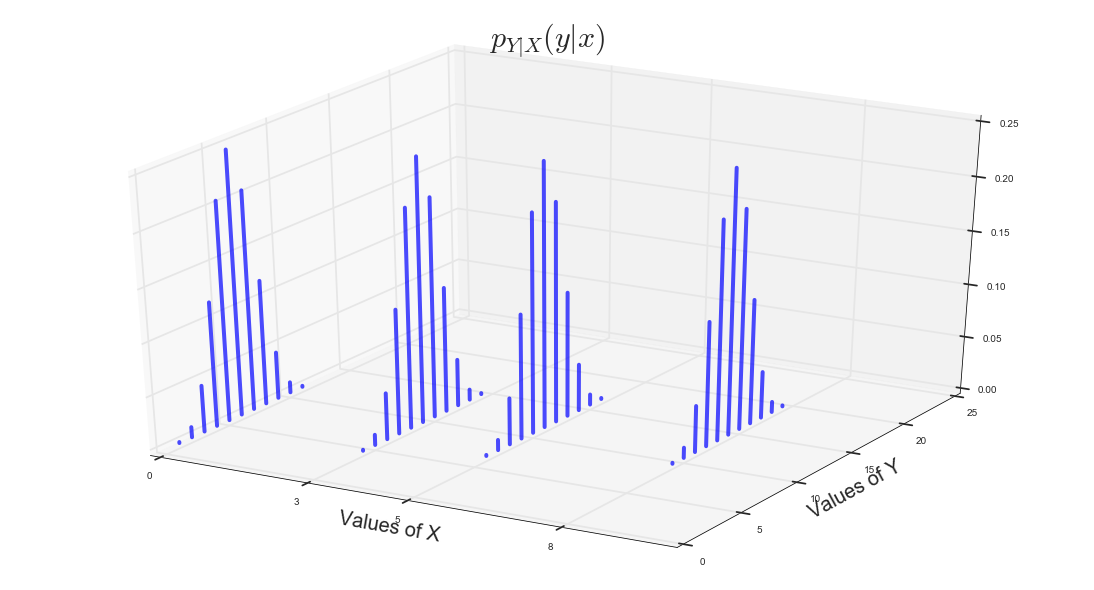

In [17]:
from numpy import linspace, sin, cos
from pylab import figure, show
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
X = np.arange(0, 21)


for s in [0, 3, 5, 8]:
    Y = ss.binom(n, p).pmf(X - s - 1)
    for x, y in zip(X, Y):
        ax.plot([s, s], [x, x], [0, y], color = "blue", linewidth = 4, alpha = .7) 
    
ax.set_xlim(0, 10)
ax.set_zlim(0, .25)
ax.set_ylim(0, 25)
ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
fig.savefig("extra_binom_3d")

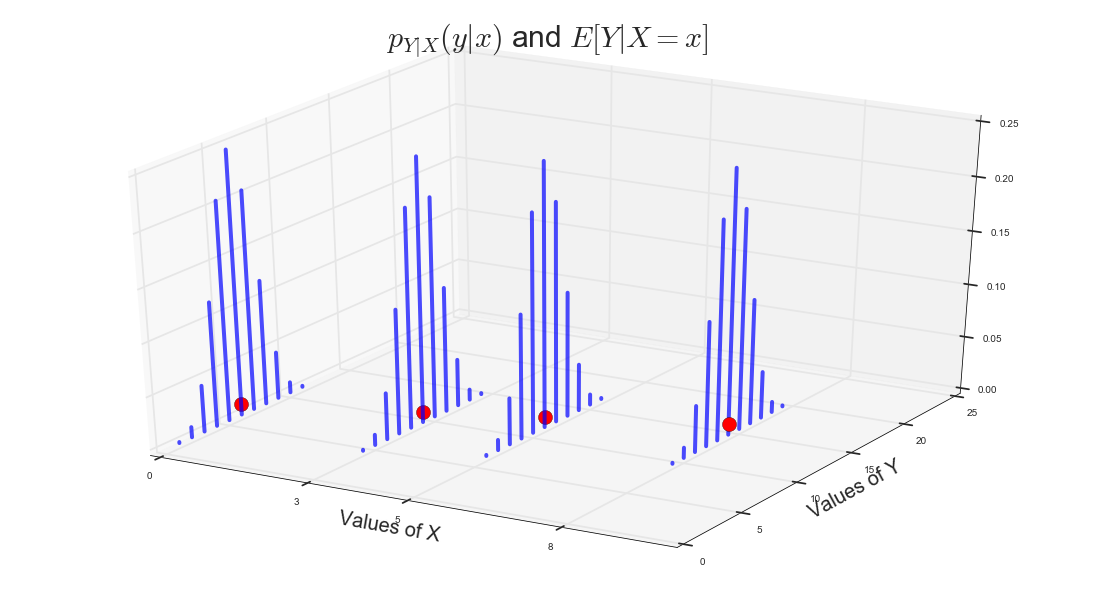

In [18]:
from numpy import linspace, sin, cos
from pylab import figure, show
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
X = np.arange(0, 21)


for s in [0, 3, 5, 8]:
    Y = ss.binom(n, p).pmf(X - s - 1)
    for x, y in zip(X, Y):
        ax.plot([s, s], [x, x], [0, y], color = "blue", linewidth = 4, alpha = .7) 
    ax.scatter(s, Y.dot(X), .01, s = 200, c = "red")
    
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)
ax.set_zlim(0, .25)

ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$ and $E[Y|X=x]$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
fig.savefig("extra_binom_3d_with_EYx")

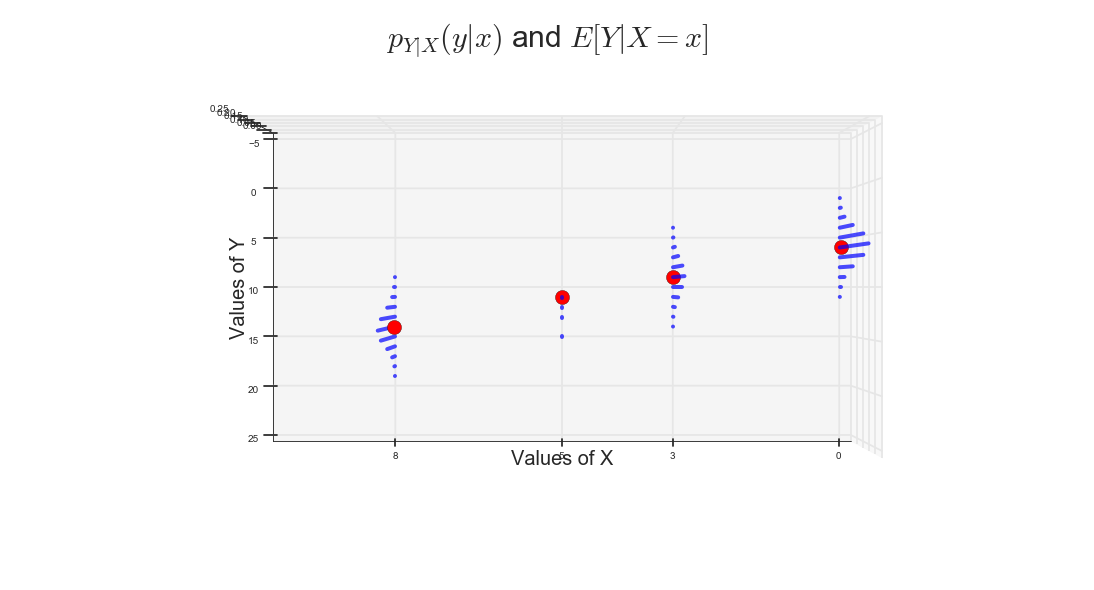

In [19]:
from numpy import linspace, sin, cos
from pylab import figure, show
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
X = np.arange(0, 21)


for s in [0, 3, 5, 8]:
    Y = ss.binom(n, p).pmf(X - s - 1)
    for x, y in zip(X, Y):
        ax.plot([s, s], [x, x], [0, y], color = "blue", linewidth = 4, alpha = .7) 
    ax.scatter(s, Y.dot(X), .01, s = 200, c = "red")
    
ax.set_xlim(0, 10)
ax.set_zlim(0, .25)

ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$ and $E[Y|X=x]$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
ax.view_init(azim = 90, elev = 90)
fig.savefig("extra_binom_3d_with_EYx_above")

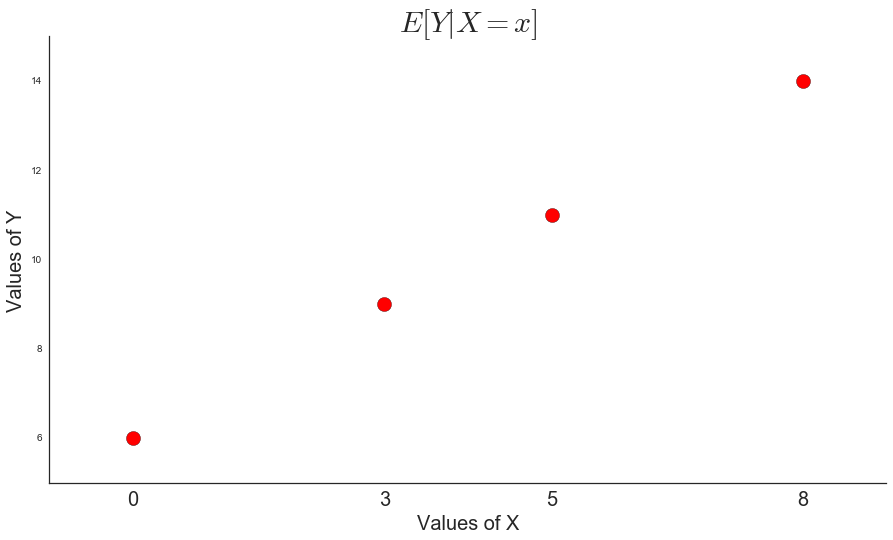

In [20]:
from numpy import linspace, sin, cos
from pylab import figure, show
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, figsize = (15, 8))
X = np.arange(0, 21)


for s in [0, 3, 5, 8]:
    Y = ss.binom(n, p).pmf(X - s - 1)
    ax.scatter(s, Y.dot(X), s = 200, c = "red")

ax.set_xticks([0, 3, 5, 8])
ax.set_xticklabels([0, 3, 5, 8], fontsize = 20)

ax.set_title("$E[Y|X=x]$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
sns.despine()
fig.savefig("extra_binom_EYx")

---

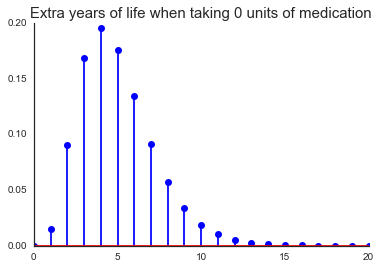

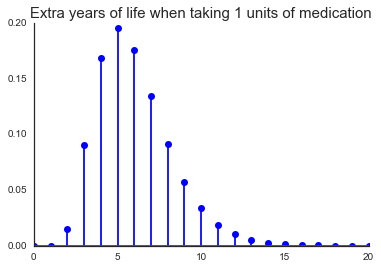

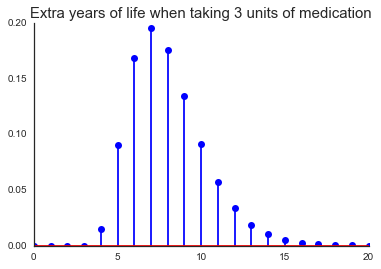

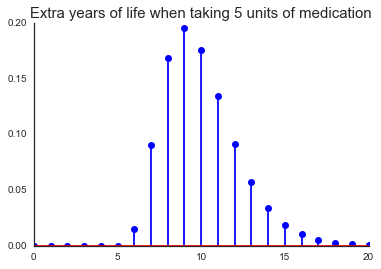

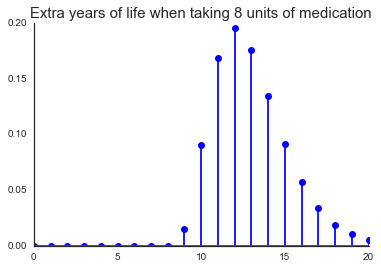

In [21]:
p = 1/2
n = 10
x = np.arange(0,25)

for s in [0, 1, 3, 5, 8]:
    fig, ax = plt.subplots(1)
    y = ss.gamma(5).pdf(x - s)
    ax.stem(y, linefmt='b-', markerfmt='bo', basefmt='r-')
    ax.set_xlim((0, 20))
    ax.set_title("Extra years of life when taking %d units of medication" % s, fontsize = 15)
    sns.despine()
    fig.savefig("extra_gamma%d" % s)

In [22]:
ax.plot?

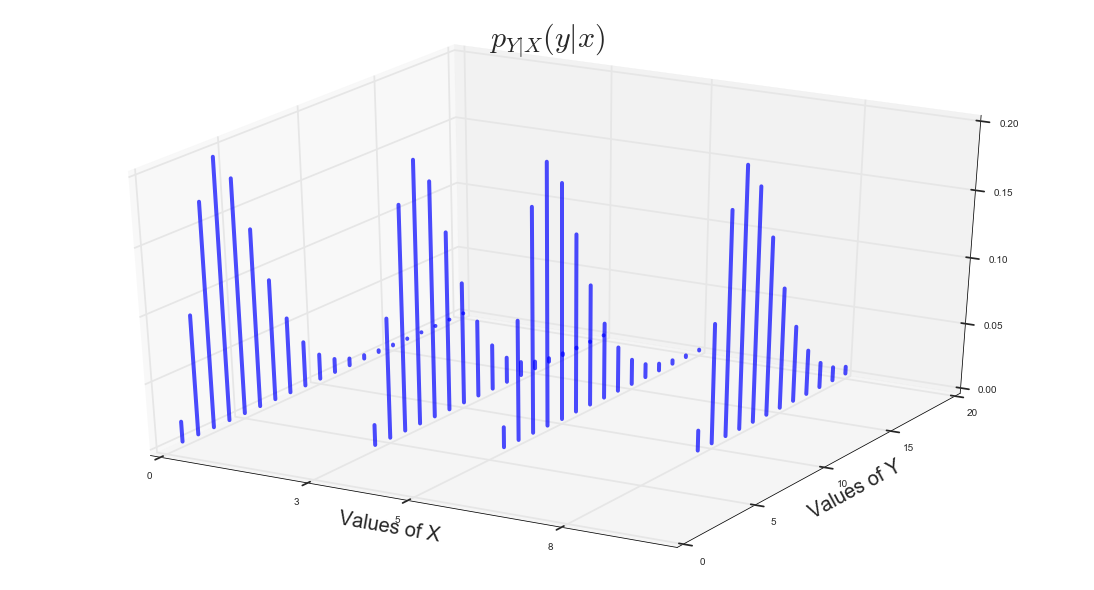

In [23]:
fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
s = 0
X = np.arange(0, 21)


for s in [0, 3, 5, 8]:
    Y = ss.gamma(5).pdf(X - s)
    for x, y in zip(X, Y):
        ax.plot([s, s], [x, x], [0, y], color = "blue", linewidth = 4, alpha = .7) 
    
ax.set_xlim(0, 10)
ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
fig.savefig("extra_gamma_3d")

---

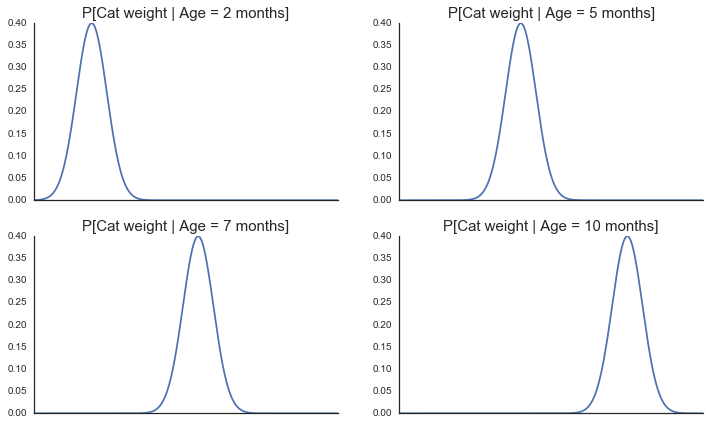

In [24]:
p = 1/2
n = 10
S = [2, 5, 7, 10]
fig, axs = plt.subplots(2, 2, figsize = (12, 7))

for k, ax in enumerate(axs.flatten()):
    X = np.linspace(0, 20, 1000)
    Y = ss.norm(loc = 1 + 1.4*S[k], scale = 1).pdf(X) 
    E = X.dot(Y)
    ax.plot(X, Y)
    ax.set_title("P[Cat weight | Age = %d months]" % (S[k]), fontsize = 15)
    ax.set_xticklabels("")
    sns.despine()
    
fig.savefig("catweights_norm")

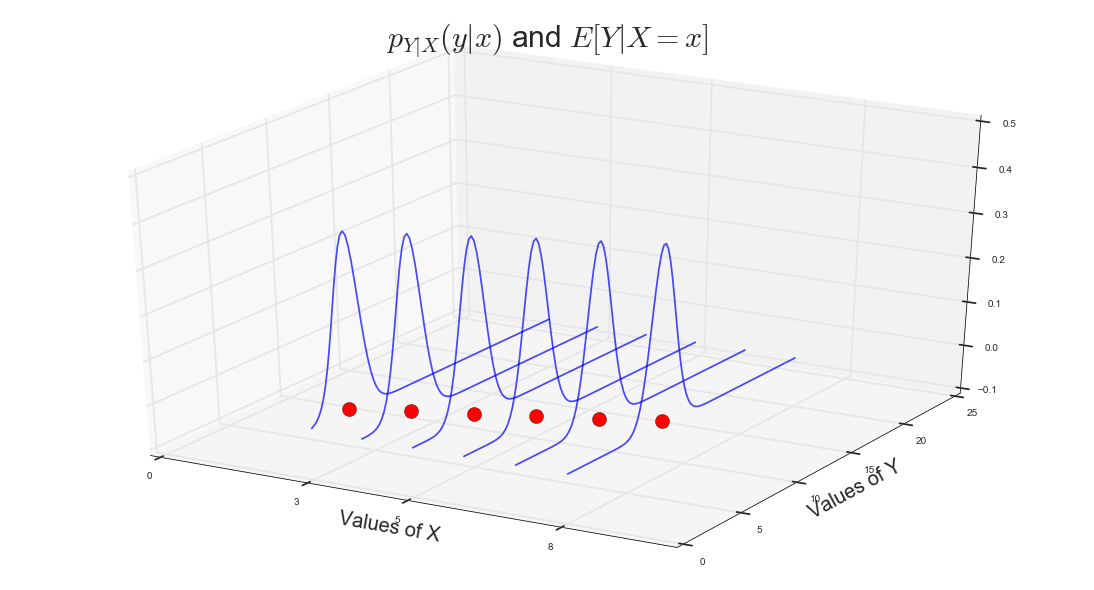

In [25]:
fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
X = np.linspace(0, 20, 100)


for s in [3, 4, 5, 6, 7, 8]:
    Y = ss.norm(s, 1).pdf(X)
    ax.plot([s]*len(X), X, Y, color = "blue", alpha = .7) 
    ax.scatter(s, s, .01, s = 200, c = "red")
    
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)
#ax.set_zlim(0, .25)

ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$ and $E[Y|X=x]$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
fig.savefig("norm_3d_EYx")

In [26]:
fig, ax = plt.subplots(1, figsize = (15, 8))
ax = Axes3D(fig)
X = np.linspace(0, 20, 100)


    Y = ss.norm(s, 1).pdf(X)
    ax.plot([s]*len(X), X, Y, color = "blue", alpha = .7) 
    ax.scatter(s, s, .01, s = 200, c = "red")
    
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)
#ax.set_zlim(0, .25)

ax.set_xticks([0, 3, 5, 8])
ax.set_title("$p_{Y|X}(y|x)$ and $E[Y|X=x]$", fontsize = 30)
ax.set_ylabel("Values of Y", fontsize = 20)
ax.set_xlabel("Values of X", fontsize = 20)
fig.savefig("norm_3d_EYx")

IndentationError: unexpected indent (<ipython-input-26-1b1ae6c427aa>, line 6)

In [57]:
X = np.random.normal(3, size = (10,1)).round(3)
Y = np.random.normal(1, 1, size = (10,1)).round(2)

In [58]:
df =pd.DataFrame(data = np.hstack([X, Y]), columns = ["X", "Y"], 
             index = ["Person %d" % d for d in range(1,11)])
df

,X,Y
Person 1,3.187,0.60
Person 2,2.908,-0.61
Person 3,2.919,0.87
Person 4,2.547,-0.57
Person 5,6.499,0.03
Person 6,3.190,2.35
Person 7,1.655,-0.22
Person 8,4.405,-0.41
Person 9,4.955,0.39
Person 10,2.196,-1.01


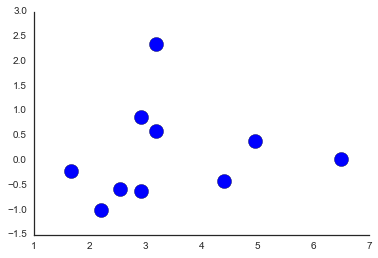

In [84]:
fig, ax = plt.subplots(1)
ax.scatter(df["X"], df["Y"], s = 200)
sns.despine()
fig.savefig("scatter_xy")

In [62]:
df1 = df[(df["X"] > 1.5) & ((df["X"] < 2.5))]
df1

,X,Y
Person 7,1.655,-0.22
Person 10,2.196,-1.01


In [79]:
means = []
for x in np.linspace(1, 6, 10):
    df1 = df[(df["X"] > x - 1) & ((df["X"] < x + 1))]
    means.append(df1["Y"].mean())

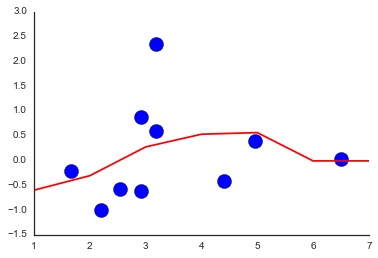

In [83]:
fig, ax = plt.subplots(1)
ax.scatter(df["X"], df["Y"], s = 200)
sns.despine()
plt.plot(means, color = "red")
ax.set_xlim((1,7))
fig.savefig("scatter_xy1")

In [94]:
XX = df["X"].values[:,np.newaxis]**np.arange(3)
Y = df["Y"]

In [93]:
import sklearn.linear_model as skl

In [97]:
ols = skl.LinearRegression().fit(XX, Y.values[:,np.newaxis])

In [103]:
XXt = np.linspace(1, 7, 100)[:,np.newaxis]**np.arange(3)

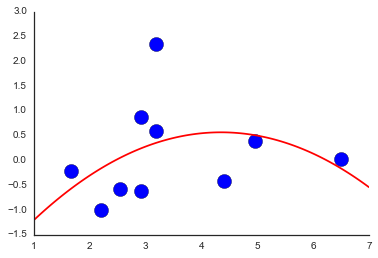

In [106]:
fig, ax = plt.subplots(1)
ax.scatter(df["X"], df["Y"], s = 200)
sns.despine()
ax.set_xlim((1,7))
plt.plot(np.linspace(1, 7, 100), ols.predict(XXt), color = "red")
fig.savefig("scatter_xy2")

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter(df["X"], df["Y"], s = 200)
sns.despine()
plt.plot(means, color = "red")
ax.set_xlim((1,7))
fig.savefig("scatter_xy1")